In [3]:
import scienceplots
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model
import os
import sys

sys.path.append("../..")

from blume.process import read, compute, plot_file, exact_m
from blume.run import Results, ModelParameters
from blume.model.post_props import Prop

plt.style.use("science")
plt.rcParams["text.usetex"] = True

T_c = 2 / np.log(1 + np.sqrt(2))

In [93]:
T_c = 2 / np.log(1 + np.sqrt(2))
chi_range = [chi for chi in range(10, 25, 2)]
params = ModelParameters(var_range=[T_c], tol=1e-11)
result = Results(varying_param="chi", range=chi_range)
result.get(params)

chi=10: 100%|██████████| 1/1 [00:06<00:00,  6.94s/it]


Saving data in folder: '15-06 13:46'
Done 



chi=12: 100%|██████████| 1/1 [00:11<00:00, 11.19s/it]


Saving data in folder: '15-06 13:46'
Done 



chi=14: 100%|██████████| 1/1 [00:12<00:00, 12.50s/it]


Saving data in folder: '15-06 13:46'
Done 



chi=16: 100%|██████████| 1/1 [00:18<00:00, 18.50s/it]


Saving data in folder: '15-06 13:46'
Done 



chi=18: 100%|██████████| 1/1 [00:29<00:00, 29.89s/it]


Saving data in folder: '15-06 13:46'
Done 



chi=20: 100%|██████████| 1/1 [00:26<00:00, 26.77s/it]


Saving data in folder: '15-06 13:46'
Done 



chi=22: 100%|██████████| 1/1 [00:51<00:00, 51.61s/it]


Saving data in folder: '15-06 13:46'
Done 



chi=24: 100%|██████████| 1/1 [00:59<00:00, 59.66s/it]

Saving data in folder: '15-06 13:46'
Done 



## Finite $\chi$ critical exponents

In [4]:
mean_mags, mean_xis, errors = [], [], []
for chi in [10, 12,14, 15, 19, 22]:
    data = read(folder='15-06 13:16', fn=f"chi{chi}")
    mags = compute(Prop.m, data)
    corrs = compute(Prop.xi, data)

    mean_xis.append(np.mean(corrs))
    mean_mags.append(np.mean(mags))
    errors.append(np.std(mags))



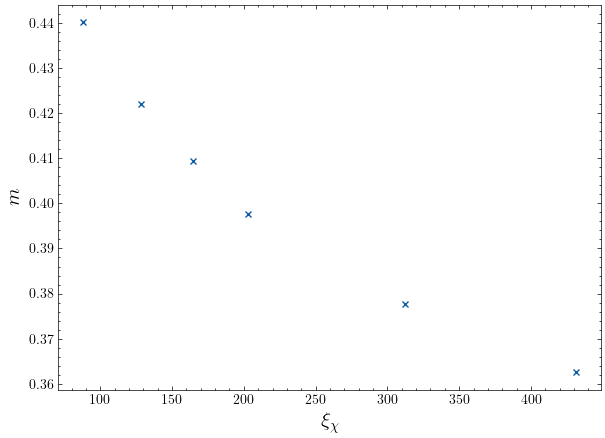

In [95]:
plt.figure(figsize=(7, 5))
plt.errorbar(mean_xis, mean_mags, yerr = errors, fmt = "x", markersize=5)
plt.xlabel(r"$\xi_{\chi}$", fontsize=15)
plt.ylabel("$m$", fontsize=15)
plt.show()

[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 365
    # data points      = 6
    # variables        = 3
    chi-square         = 1.6364e-06
    reduced chi-square = 5.4546e-07
    Akaike info crit   = -84.6886574
    Bayesian info crit = -85.3133790
    R-squared          = 0.99959885
[[Variables]]
    a:  0.06145859 +/- 0.04733849 (77.03%) (init = 0.5)
    b: -0.39940412 +/- 0.61582526 (154.19%) (init = 0.5)
    c:  1.10597533 +/- 0.57596004 (52.08%) (init = 0.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(b, c) = -1.0000
    C(a, b) = +0.9999
    C(a, c) = -0.9998


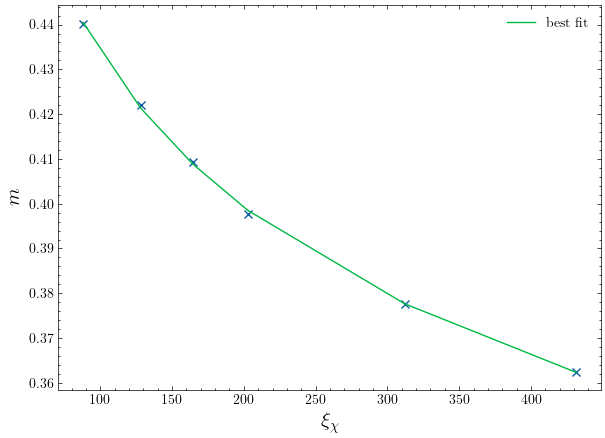

In [96]:
model = Model(lambda x, a, b, c: c*x**(-a)+b)

x, y = mean_xis, mean_mags

params = model.make_params(a=0.5, b=0.5, c=0.5)
result = model.fit(y, params, x=x)

print(result.fit_report())

plt.figure(figsize= (7, 5))
plt.plot(x, y, 'x')
plt.plot(x, result.best_fit, '-', label='best fit')
plt.xlabel(r"$\xi_{\chi}$", fontsize=15)
plt.ylabel("$m$", fontsize=15)
plt.legend()
plt.show()

In [97]:
print(f"Obtained crit. exp.: {result.params['a'].value} +/- {result.params['a'].stderr}")
print(f"exact crit. exp.: {1/8}")

Obtained crit. exp.: 0.06145858968834239 +/- 0.04733849354691994
exact crit. exp.: 0.125


## Log transformation

[[Model]]
    Model(<lambda>)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 5
    # variables        = 2
    chi-square         = 4.5398e-06
    reduced chi-square = 1.5133e-06
    Akaike info crit   = -65.5603245
    Bayesian info crit = -66.3414487
    R-squared          = 0.99969685
[[Variables]]
    a:  0.12511829 +/- 0.00125793 (1.01%) (init = 0.5)
    b: -0.25577761 +/- 0.00683501 (2.67%) (init = 0.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = +0.9968


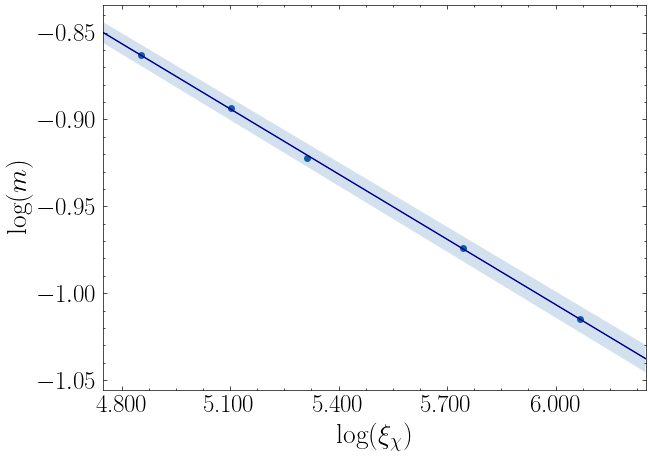

In [10]:
from matplotlib.ticker import FormatStrFormatter, MaxNLocator

log_xis = [np.log(xi) for xi in mean_xis]
log_mags = [np.log(m) for m in mean_mags]

model = Model(lambda x, a, b: -a*x+b)

x, y = log_xis, log_mags
x.pop(0)
y.pop(0)


params = model.make_params(a=0.5, b=0.5)
result = model.fit(y, params, x=x)

print(result.fit_report())

plt.figure(figsize= (7, 5))
plt.plot(x, y, 'o', markersize = 4)

x = [e for e in np.arange(4.75, 6.25, 0.001)]
y = [-result.params["a"].value*e + result.params["b"] for e in x]
plt.plot(x, y, '-', label='best fit', color = "b", linewidth=0.5)

y_upper = [-(result.params["a"].value + result.params["a"].stderr) *e + result.params["b"] for e in x]
y_lower = [-(result.params["a"].value - result.params["a"].stderr) *e + result.params["b"] for e in x]

plt.fill_between(x, y_upper, y_lower, alpha = 0.18)

plt.plot(x, y, color = "darkblue", linewidth=1)

plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
#plt.minorticks_off()

plt.locator_params(axis='y', nbins=6)
plt.locator_params(axis='x', nbins=5)

plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

plt.ticklabel_format(axis='both', style='sci', )

plt.xlabel(r"$\log(\xi_{\chi})$", fontsize=20)
plt.ylabel("$\log(m)$", fontsize=20)
plt.xlim(4.75, 6.25)
plt.show()

In [145]:
print(f"Obtained crit. exp.: {result.params['a'].value} +/- {result.params['a'].stderr}")
print(f"exact crit. exp.: {1/8}")

Obtained crit. exp.: 0.12511828885239973 +/- 0.001257933874923368
exact crit. exp.: 0.125
